In [401]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity as ssim
import imutils
import skimage

In [402]:
imgA0 = cv2.imread("cup1.jpg")
imgB0 = cv2.imread("cup2.jpg")
imgA = cv2.imread("cup1.jpg")
imgB = cv2.imread("cup2.jpg")

Text(0, 0.5, 'number of pixels')

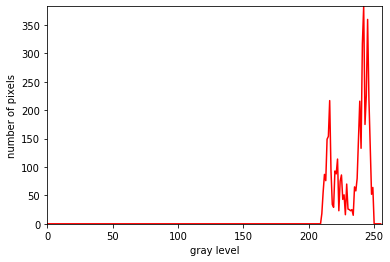

In [417]:
hist = cv2.calcHist(imgA,[0],None,[256],[0,256])
plt.plot(hist,color="r"),plt.axis([0,256,0,np.max(hist)])
plt.xlabel("gray level")
plt.ylabel("number of pixels")

In [388]:
#resize
# scale_percent = 60       # percent of original size
# width = int(imgA.shape[1] * scale_percent / 100)
# height = int(imgA.shape[0] * scale_percent / 100)
# dim = (width, height)

# imgA = cv2.resize(imgA, dim, interpolation = cv2.INTER_AREA)
# imgB = cv2.resize(imgB, dim, interpolation = cv2.INTER_AREA)

In [389]:
# 正规化
imgA=cv2.normalize(imgA,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)
imgB=cv2.normalize(imgB,dst=None,alpha=350,beta=10,norm_type=cv2.NORM_MINMAX)

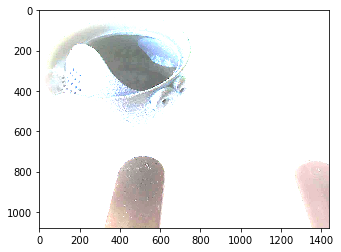

In [390]:
# 增强对比度
imgA = cv2.convertScaleAbs(imgA,alpha=3,beta=0)
imgB = cv2.convertScaleAbs(imgB,alpha=3,beta=0)
plt.imshow(imgA)

In [403]:
# 转换成灰色
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

True

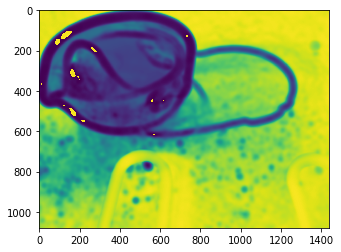

In [404]:
(score, diff) = ssim(grayA, grayB, full=True, gaussian_weights =True, sigma = 10)
diff = (diff * 255).astype("uint8")

plt.imshow(diff)
cv2.imwrite('diff.jpg',diff)

In [405]:
_,thresh = cv2.threshold(diff, 255, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

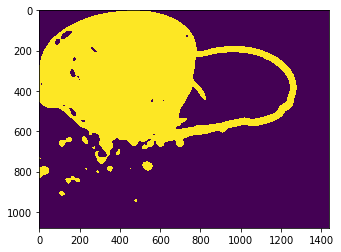

In [406]:
plt.imshow(thresh)

In [407]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [408]:
thresh.shape

(1080, 1440)

In [409]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [410]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imgA0, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imgB0, (x, y), (x + w, y + h), (0, 0, 255), 2)

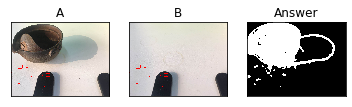

In [411]:
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(imgA0, cv2.COLOR_BGR2RGB)), plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(imgB0, cv2.COLOR_BGR2RGB)), plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)), plt.title('Answer'), plt.xticks([]), plt.yticks([])
plt.show()

True

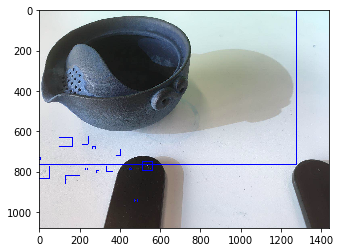

In [412]:
plt.imshow(imgA0)
cv2.imwrite('resoult_cup.jpg',imgA0)